<a href="https://colab.research.google.com/github/thanawat-hub/sharing_colab-github/blob/master/part2_after_libsora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

refer https://medium.com/@decimo.me/%E0%B8%88%E0%B8%B3%E0%B9%81%E0%B8%99%E0%B8%81%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%9E%E0%B8%B9%E0%B8%94%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%99%E0%B8%95%E0%B8%A3%E0%B8%B5%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-convolutional-neural-networks-%E0%B9%83%E0%B8%99-keras-%E0%B8%81%E0%B8%B1%E0%B8%99-3d52120987a6 


credit code by Decimo

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


download dataset => https://www.kaggle.com/lnicalo/gtzan-musicspeech-collection
and create file csv for tain,test model

In [0]:
import os 
os.chdir('/content/drive/My Drive/dataset/dataset')
!ls

acomic2.wav	comedy.wav	georg.wav      march.wav     rock2.wav
acomic.wav	conversion.wav	georose.wav    marlene.wav   rock.wav
allison.wav	copland2.wav	gismonti.wav   mingus1.wav   russo.wav
amal.wav	copland.wav	glass1.wav     mingus.wav    serbian.wav
austria.wav	corea1.wav	glass.wav      misirlou.wav  shannon.wav
bagpipe.wav	corea.wav	god.wav        moanin.wav    sleep.wav
ballad.wav	cure.wav	gravity2.wav   my_voice.wav  smoke1.wav
bartok.wav	danie1.wav	gravity.wav    narch.wav     smoking.wav
bathroom1.wav	danie.wav	greek1.wav     ncherry.wav   stupid.wav
beatles.wav	debussy.wav	greek.wav      nearhou.wav   teachers1.wav
beat.wav	deedee1.wav	guitar.wav     nether.wav    teachers2.wav
bigband.wav	deedee.wav	hendrix.wav    news1.wav     teachers.wav
birdland.wav	dialogue1.wav	india.wav      news2.wav     thlui.wav
blues.wav	dialogue2.wav	ipanema.wav    nj105a.wav    tony.wav
bmarsalis.wav	dialogue.wav	jazz1.wav      nj105.wav     u2.wav
brahms.wav	diamond.wav	jazz.wav       oneday.wav 

In [0]:
# To determine which version you're using:
!pip show tensorflow

# # For the current version: 
# !pip install --upgrade tensorflow

# # For a specific version:
# !pip install tensorflow==1.2

# # For the latest nightly build:
# !pip install tf-nightly

Name: tensorflow
Version: 2.2.0rc3
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorflow-estimator, wheel, absl-py, protobuf, astunparse, numpy, six, wrapt, gast, termcolor, grpcio, opt-einsum, keras-preprocessing, tensorboard, h5py, scipy, google-pasta
Required-by: fancyimpute


In [0]:
import numpy as np
import pandas as pd
gtzan_dataset = pd.read_csv('/content/drive/My Drive/dataset/gtzan_dataset.csv')
gtzan_dataset.shape

(128, 4)

In [0]:
gtzan_dataset.head()

,filename,label,label_name,sets
0,ballad.wav,0,music,train
1,bartok.wav,0,music,train
2,beatles.wav,0,music,train
3,beat.wav,0,music,train
4,bigband.wav,0,music,train


In [0]:
#create for read file csv
import os
import numpy as np
import pandas as pd
import librosa

def load_gtzan():
  metadata = pd.read_csv(os.path.join('/content/drive/My Drive/dataset/', 'gtzan_dataset.csv'))
    
  rows_meta = []
  rows_audio = []
    
  for key, row in metadata.iterrows():
    filename = row['filename']
    label = row['label']
    label_name = row['label_name']
    dataset = row['sets']
    rows_meta.append(
      pd.DataFrame({
        'filename': filename,
        'label': label, 
        'label_name': label_name,
        'sets': dataset
      }, index=[0])
    )
    audio_path = os.path.join('/content/drive/My Drive/dataset/', 'dataset', filename)
    audio, sr = librosa.load(audio_path)
    if audio is not None:
      rows_audio.append(audio)
### ตอนในfor จะแบ่งเป็น2 ข้อมูล คือตัวDataframe ที่มีเหมือนตารางข้อมูล csv, และมี ตัวดาต้าอาเรย์เสียง
  rows_meta = pd.concat(rows_meta, ignore_index=True) #ทำการต่อกันเป็นตาราง โดยไม่สนindex
  
  rows_audio = np.vstack(rows_audio) #ใช้ np.vstack เพื่อเปลี่ยน array 1D => 2D  
    # Stack arrays in sequence vertically 
    # This is equivalent to concatenation along the first axis after 1-D arrays of shape (N,) have been reshaped to (1,N). Rebuilds arrays divided by vsplit.
    # This function makes most sense for arrays with up to 3 dimensions.
  rows_meta[['label']] = rows_meta[['label']].astype(int)
    
  return rows_meta, rows_audio


In [0]:
type(gtzan_meta['label'])

pandas.core.series.Series

In [0]:
gtzan_meta[['label']]

0      0
1      0
2      0
3      0
4      0
      ..
123    1
124    1
125    1
126    1
127    1
Name: label, Length: 128, dtype: int64

In [0]:
type(gtzan_meta[['label']])

pandas.core.frame.DataFrame

In [0]:
gtzan_meta[['label']]

,label
0,0
1,0
2,0
3,0
4,0
...,...
123,1
124,1
125,1
126,1


In [0]:
metadata #read csv file

,filename,label,label_name,sets
0,ballad.wav,0,music,train
1,bartok.wav,0,music,train
2,beatles.wav,0,music,train
3,beat.wav,0,music,train
4,bigband.wav,0,music,train
...,...,...,...,...
123,nether.wav,1,speech,train
124,sleep.wav,1,speech,train
125,voice.wav,1,speech,train
126,male.wav,1,speech,train


key =>1
    ...
    126
    127
row => ...
**filename**      teachers2.wav
**label  **                   1
**label_name **          speech
**sets  **                train
**Name**: 127, **dtype**: object

In [0]:
#unpack values of metadata
#Iterate over DataFrame rows as (index, Series) pairs.
# index is key, Series is row 
metadata = pd.read_csv(os.path.join('/content/drive/My Drive/dataset/', 'gtzan_dataset.csv'))
g = metadata.iterrows()
g

<generator object DataFrame.iterrows at 0x7f5bd0d721a8>

In [0]:
load_gtzan()
#print(rows_meta) 
#print(rows_audio) #array data of audio
#in for loop before ###

Streaming output truncated to the last 5000 lines.
0  prodigy.wav      0      music  train,        filename  label label_name   sets
0  copland2.wav      0      music  train,      filename  label label_name   sets
0  glass1.wav      0      music  train,     filename  label label_name   sets
0  march.wav      0      music  train,      filename  label label_name   sets
0  redhot.wav      0      music  train,       filename  label label_name   sets
0  copland.wav      0      music  train,     filename  label label_name   sets
0  glass.wav      0      music  train,       filename  label label_name   sets
0  marlene.wav      0      music  train,     filename  label label_name   sets
0  rock2.wav      0      music  train,      filename  label label_name   sets
0  corea1.wav      0      music  train,        filename  label label_name   sets
0  gravity2.wav      0      music  train,       filename  label label_name   sets
0  mingus1.wav      0      music  train,    filename  label label_name  

2                   >>>load<<<


In [0]:
gtzan_meta, gtzan_audio = load_gtzan() #both ndim = 2 di

In [0]:
gtzan_meta

,filename,label,label_name,sets
0,ballad.wav,0,music,train
1,bartok.wav,0,music,train
2,beatles.wav,0,music,train
3,beat.wav,0,music,train
4,bigband.wav,0,music,train
...,...,...,...,...
123,nether.wav,1,speech,train
124,sleep.wav,1,speech,train
125,voice.wav,1,speech,train
126,male.wav,1,speech,train


In [0]:
gtzan_audio

array([[-0.00054932,  0.00048828,  0.00241089, ...,  0.00512695,
         0.00592041,  0.00720215],
       [ 0.05819702,  0.04968262,  0.03445435, ..., -0.0586853 ,
        -0.0569458 , -0.05279541],
       [ 0.00375366,  0.05966187,  0.0874939 , ..., -0.04647827,
        -0.04626465, -0.04187012],
       ...,
       [ 0.01324463,  0.00772095,  0.02810669, ..., -0.04312134,
        -0.04196167, -0.04089355],
       [-0.01153564, -0.01861572, -0.00015259, ..., -0.0322876 ,
         0.0234375 ,  0.05834961],
       [ 0.0223999 ,  0.01870728,  0.01754761, ...,  0.00350952,
         0.0065918 ,  0.00671387]], dtype=float32)

In [0]:
import numpy as np
import pandas as pd
from librosa.feature import melspectrogram
from librosa.core import amplitude_to_db

import multiprocessing
from joblib import Parallel, delayed

CPU_COUNT = multiprocessing.cpu_count()

def extract_segments(clip, filename, sets, label, label_name, frames):
  FRAMES_PER_SEGMENT = frames - 1  # 41 frames ~= 950 ms
  WINDOW_SIZE = 512 * FRAMES_PER_SEGMENT  # 23 ms per frame
  STEP_SIZE = 512 * FRAMES_PER_SEGMENT // 2  # 512 * 20 = 10240
  BANDS = 60
    
  s = 0
  segments = []
  
  normalization_factor = 1 / np.max(np.abs(clip))
  clip = clip * normalization_factor
    
  while len(clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]) == WINDOW_SIZE:
    signal = clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]
    melspec = melspectrogram(signal, sr=22050, n_fft=1024, hop_length=512, n_mels=BANDS)
    logspec = amplitude_to_db(melspec)
    logspec = logspec.T.flatten()[:, np.newaxis].T
    logspec = pd.DataFrame(
      data=logspec, dtype='float32', index=[0],
      columns=list('logspec_b{}_f{}'.format(i % BANDS, i // BANDS) for i in range(np.shape(logspec)[1]))
    )
    if np.mean(logspec.values) > -70.0:
      segment_meta = pd.DataFrame({
        'filename': filename,
        'sets': sets,
        'label': label,
        'label_name': label_name,
        's_begin': s * STEP_SIZE,
        's_end': s * STEP_SIZE + WINDOW_SIZE
      }, index=[0])
      segments.append(pd.concat((segment_meta, logspec), axis=1))
            
    s = s + 1
        
  segments = pd.concat(segments, ignore_index=True)
  return segments
  
def extract_features(meta, audio, frames=41):
  np.random.seed(20170927)
  batch_size = 100
  segments = []
    
  for b in range(len(audio) // batch_size + 1):
    start = b * batch_size
    end = (b + 1) * batch_size
    if end > len(audio):
      end = len(audio)
    segments.extend(Parallel(n_jobs=CPU_COUNT)(delayed(extract_segments)(
      audio[i, :],
      meta.loc[i, 'filename'],
      meta.loc[i, 'sets'],
      meta.loc[i, 'label'],
      meta.loc[i, 'label_name'],
      frames) for i in range(start, end)))
    segments = [pd.concat(segments, ignore_index=True)]
    
  return segments[0]

In [0]:
gtzan_features = extract_features(gtzan_meta, gtzan_audio)


In [0]:
gtzan_features

,filename,sets,label,label_name,s_begin,s_end,logspec_b0_f0,logspec_b1_f0,logspec_b2_f0,logspec_b3_f0,logspec_b4_f0,logspec_b5_f0,logspec_b6_f0,logspec_b7_f0,logspec_b8_f0,logspec_b9_f0,logspec_b10_f0,logspec_b11_f0,logspec_b12_f0,logspec_b13_f0,logspec_b14_f0,logspec_b15_f0,logspec_b16_f0,logspec_b17_f0,logspec_b18_f0,logspec_b19_f0,logspec_b20_f0,logspec_b21_f0,logspec_b22_f0,logspec_b23_f0,logspec_b24_f0,logspec_b25_f0,logspec_b26_f0,logspec_b27_f0,logspec_b28_f0,logspec_b29_f0,logspec_b30_f0,logspec_b31_f0,logspec_b32_f0,logspec_b33_f0,...,logspec_b20_f40,logspec_b21_f40,logspec_b22_f40,logspec_b23_f40,logspec_b24_f40,logspec_b25_f40,logspec_b26_f40,logspec_b27_f40,logspec_b28_f40,logspec_b29_f40,logspec_b30_f40,logspec_b31_f40,logspec_b32_f40,logspec_b33_f40,logspec_b34_f40,logspec_b35_f40,logspec_b36_f40,logspec_b37_f40,logspec_b38_f40,logspec_b39_f40,logspec_b40_f40,logspec_b41_f40,logspec_b42_f40,logspec_b43_f40,logspec_b44_f40,logspec_b45_f40,logspec_b46_f40,logspec_b47_f40,logspec_b48_f40,logspec_b49_f40,logspec_b50_f40,logspec_b51_f40,logspec_b52_f40,logspec_b53_f40,logspec_b54_f40,logspec_b55_f40,logspec_b56_f40,logspec_b57_f40,logspec_b58_f40,logspec_b59_f40
0,ballad.wav,train,0,music,0,20480,1.599163,-21.533451,-18.118059,-11.065392,8.241525,-3.289161,-5.877753,-4.342335,-15.694952,-11.847941,-32.202438,-23.519974,-20.294003,-43.396107,-38.933304,-48.537868,-25.199150,-16.324535,-34.959480,-31.592896,-44.622978,-21.850882,-19.405994,-31.456457,-40.291763,-37.461796,-32.572002,-40.672657,-42.868114,-46.193130,-25.140339,-25.673094,-35.427467,-52.208416,...,-35.233482,-20.114536,-22.118601,-33.476933,-30.389946,-30.842421,-42.993233,-53.601665,-35.389011,-32.463276,-53.601665,-53.601665,-53.601665,-53.364059,-46.458290,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665
1,ballad.wav,train,0,music,10240,30720,3.317242,-17.296041,-16.718784,-5.732122,18.054733,15.326269,18.856083,10.555192,13.210656,25.854338,20.646126,-4.418228,-21.590660,-32.256748,-28.213289,-21.096373,-2.093841,-16.628748,-32.940392,-25.261858,-31.951845,-36.769939,-28.676571,-22.155479,-10.601213,-20.827686,-22.391510,-29.067432,-11.061238,-14.984318,-47.807690,-41.152081,-40.733150,-48.637802,...,-50.928947,-50.171257,-32.844814,-26.936325,-27.163242,-17.184690,-20.686922,-29.962959,-42.372890,-42.164955,-48.743782,-50.641567,-50.928947,-46.080826,-50.928947,-50.928947,-42.815536,-44.926025,-50.928947,-49.245872,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947
2,ballad.wav,train,0,music,20480,40960,-0.490095,-12.730447,-10.197099,-16.712351,-9.053824,-4.488536,-24.952227,-11.863269,-5.964044,3.329841,-4.389412,-20.603876,-30.217451,-20.035564,-25.286808,-45.436615,-40.335320,-39.061031,-46.827545,-28.847469,-31.006615,-19.488918,-25.755989,-39.594456,-32.428696,-38.771587,-46.827545,-46.827545,-36.836388,-33.042992,-46.827545,-46.827545,-46.827545,-46.827545,...,-27.644142,-14.210316,-0.924513,4.036103,2.082629,-20.821800,-20.928846,-23.377447,-28.087475,-37.761211,-20.470705,-17.979342,-34.713921,-35.137440,-39.618752,-40.251259,-26.826647,-46.827545,-46.827545,-38.137753,-27.796148,-45.280914,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545
3,ballad.wav,train,0,music,30720,51200,-2.203542,-23.220888,-13.837705,6.755620,1.231936,-18.514818,-14.009556,8.534457,13.790166,13.272655,5.059160,-5.729146,-10.161418,-12.277072,-7.220101,-7.943370,-19.797882,-37.215256,-43.837898,-32.955887,-43.837898,-36.206444,-20.938

In [0]:
class_count = len(pd.unique(gtzan_features['label']))
class_count

2

In [0]:
new_dim = np.zeros(tuple(np.shape(X_train)))
X = np.concatenate((X_train, new_dim), axis=3)
X

array([[[[ 1.4201746 ,  0.        ],
         [ 1.52120173,  0.        ],
         [ 1.32645607,  0.        ],
         ...,
         [ 1.51769626,  0.        ],
         [ 1.54131985,  0.        ],
         [ 1.4097333 ,  0.        ]],

        [[ 0.32713017,  0.        ],
         [ 0.61524212,  0.        ],
         [ 0.30666423,  0.        ],
         ...,
         [ 0.92195195,  0.        ],
         [ 0.84611517,  0.        ],
         [ 1.02526331,  0.        ]],

        [[ 0.48851165,  0.        ],
         [ 0.8715111 ,  0.        ],
         [ 0.4971199 ,  0.        ],
         ...,
         [ 1.01026595,  0.        ],
         [ 1.01057494,  0.        ],
         [ 0.94443774,  0.        ]],

        ...,

        [[-1.18813229,  0.        ],
         [-1.18813229,  0.        ],
         [-1.18813229,  0.        ],
         ...,
         [-1.18813229,  0.        ],
         [-1.18813229,  0.        ],
         [-1.18813229,  0.        ]],

        [[-1.18813229,  0.        

In [0]:
import numpy as np
import pandas as pd
from librosa.feature import delta

shape = (-1, 60, 41, 1)
start_col = 'logspec_b0_f0'
end_col = gtzan_features.columns[-1]
class_count = len(pd.unique(gtzan_features['label']))

def generate_deltas(X): 
#X_train => 4 ndim = (5665, 60, 41, 1)

#X_test => 4 ndim (2391, 60, 41, 1)
  new_dim = np.zeros(tuple(np.shape(X))) #สร้างอาเรย์ 0 ที่มี shape เท่ากับตัวที่เข้ามา 
  X = np.concatenate((X, new_dim), axis=3)
  del new_dim

  for i in range(len(X)):
    X[i, :, :, 1] = delta(X[i, :, :, 0])
  return X
  
def to_one_hot(labels, class_count):
  one_hot_enc = np.zeros((len(labels), class_count))
  for r in range(len(labels)):
    one_hot_enc[r, labels[r]] = 1
  return one_hot_enc

train = gtzan_features[(gtzan_features['sets'] == 'train')]
test = gtzan_features[(gtzan_features['sets'] == 'test')]

X_train = train.loc[:, start_col:end_col].values
y_train = to_one_hot(train['label'].values, class_count)

X_test = test.loc[:, start_col:end_col].values
y_test = to_one_hot(test['label'].values, class_count)

X_mean = np.mean(X_train)
X_std = np.std(X_train)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = np.reshape(X_train, shape, order='F')
X_test = np.reshape(X_test, shape, order='F')

X_train = generate_deltas(X_train)
X_test = generate_deltas(X_test)



In [0]:
X_train.shape

(5665, 60, 41, 2)

In [0]:
gtzan_features.head(65)

,filename,sets,label,label_name,s_begin,s_end,logspec_b0_f0,logspec_b1_f0,logspec_b2_f0,logspec_b3_f0,logspec_b4_f0,logspec_b5_f0,logspec_b6_f0,logspec_b7_f0,logspec_b8_f0,logspec_b9_f0,logspec_b10_f0,logspec_b11_f0,logspec_b12_f0,logspec_b13_f0,logspec_b14_f0,logspec_b15_f0,logspec_b16_f0,logspec_b17_f0,logspec_b18_f0,logspec_b19_f0,logspec_b20_f0,logspec_b21_f0,logspec_b22_f0,logspec_b23_f0,logspec_b24_f0,logspec_b25_f0,logspec_b26_f0,logspec_b27_f0,logspec_b28_f0,logspec_b29_f0,logspec_b30_f0,logspec_b31_f0,logspec_b32_f0,logspec_b33_f0,...,logspec_b20_f40,logspec_b21_f40,logspec_b22_f40,logspec_b23_f40,logspec_b24_f40,logspec_b25_f40,logspec_b26_f40,logspec_b27_f40,logspec_b28_f40,logspec_b29_f40,logspec_b30_f40,logspec_b31_f40,logspec_b32_f40,logspec_b33_f40,logspec_b34_f40,logspec_b35_f40,logspec_b36_f40,logspec_b37_f40,logspec_b38_f40,logspec_b39_f40,logspec_b40_f40,logspec_b41_f40,logspec_b42_f40,logspec_b43_f40,logspec_b44_f40,logspec_b45_f40,logspec_b46_f40,logspec_b47_f40,logspec_b48_f40,logspec_b49_f40,logspec_b50_f40,logspec_b51_f40,logspec_b52_f40,logspec_b53_f40,logspec_b54_f40,logspec_b55_f40,logspec_b56_f40,logspec_b57_f40,logspec_b58_f40,logspec_b59_f40
0,ballad.wav,train,0,music,0,20480,1.599163,-21.533451,-18.118059,-11.065392,8.241525,-3.289161,-5.877753,-4.342335,-15.694952,-11.847941,-32.202438,-23.519974,-20.294003,-43.396107,-38.933304,-48.537868,-25.199150,-16.324535,-34.959480,-31.592896,-44.622978,-21.850882,-19.405994,-31.456457,-40.291763,-37.461796,-32.572002,-40.672657,-42.868114,-46.193130,-25.140339,-25.673094,-35.427467,-52.208416,...,-35.233482,-20.114536,-22.118601,-33.476933,-30.389946,-30.842421,-42.993233,-53.601665,-35.389011,-32.463276,-53.601665,-53.601665,-53.601665,-53.364059,-46.458290,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665,-53.601665
1,ballad.wav,train,0,music,10240,30720,3.317242,-17.296041,-16.718784,-5.732122,18.054733,15.326269,18.856083,10.555192,13.210656,25.854338,20.646126,-4.418228,-21.590660,-32.256748,-28.213289,-21.096373,-2.093841,-16.628748,-32.940392,-25.261858,-31.951845,-36.769939,-28.676571,-22.155479,-10.601213,-20.827686,-22.391510,-29.067432,-11.061238,-14.984318,-47.807690,-41.152081,-40.733150,-48.637802,...,-50.928947,-50.171257,-32.844814,-26.936325,-27.163242,-17.184690,-20.686922,-29.962959,-42.372890,-42.164955,-48.743782,-50.641567,-50.928947,-46.080826,-50.928947,-50.928947,-42.815536,-44.926025,-50.928947,-49.245872,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947,-50.928947
2,ballad.wav,train,0,music,20480,40960,-0.490095,-12.730447,-10.197099,-16.712351,-9.053824,-4.488536,-24.952227,-11.863269,-5.964044,3.329841,-4.389412,-20.603876,-30.217451,-20.035564,-25.286808,-45.436615,-40.335320,-39.061031,-46.827545,-28.847469,-31.006615,-19.488918,-25.755989,-39.594456,-32.428696,-38.771587,-46.827545,-46.827545,-36.836388,-33.042992,-46.827545,-46.827545,-46.827545,-46.827545,...,-27.644142,-14.210316,-0.924513,4.036103,2.082629,-20.821800,-20.928846,-23.377447,-28.087475,-37.761211,-20.470705,-17.979342,-34.713921,-35.137440,-39.618752,-40.251259,-26.826647,-46.827545,-46.827545,-38.137753,-27.796148,-45.280914,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545,-46.827545
3,ballad.wav,train,0,music,30720,51200,-2.203542,-23.220888,-13.837705,6.755620,1.231936,-18.514818,-14.009556,8.534457,13.790166,13.272655,5.059160,-5.729146,-10.161418,-12.277072,-7.220101,-7.943370,-19.797882,-37.215256,-43.837898,-32.955887,-43.837898,-36.206444,-20.938

เตรียมข้อมูลเสร็จ


In [0]:
from keras.models import Sequential	
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(60, 41, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# layer 2
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# full connected
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

AttributeError: ignored

In [0]:
!cat /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py | grep "return isinstance(x, tf_ops._TensorLike) or tf_ops.is_dense_tensor_like(x)"

    return isinstance(x, tf_ops._TensorLike) or tf_ops.is_dense_tensor_like(x)


https://github.com/tensorflow/tensorflow/issues/38589

In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.2.0
Summary: TensorFlow helps the tensors flow
Home-page: http://tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: html5lib, protobuf, backports.weakref, six, numpy, markdown, bleach, wheel, werkzeug
Required-by: fancyimpute


In [0]:
!pip install keras

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-dev20200427


In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 28kB/s 
     |████████████████████████████████| 3.9MB 26.1MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=15efb4e7f10185ce4cb346a879613b7a83f567e503a6c6c15c1b6352a05b6131
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Un

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
from keras.models import Sequential	
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(60, 41, 2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# layer 2
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# full connected
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Using TensorFlow backend.


Using TensorFlow backend.

In [0]:
history = model.fit(X_train,
                    y_train,
                    batch_size=512,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 5665 samples, validate on 2391 samples
Epoch 1/100
5665/5665 [==============================] - 7s 1ms/step - loss: 1.2135 - accuracy: 0.5230 - val_loss: 0.6917 - val_accuracy: 0.5517
Epoch 2/100
5665/5665 [==============================] - 0s 70us/step - loss: 0.6743 - accuracy: 0.6448 - val_loss: 0.6896 - val_accuracy: 0.5947
Epoch 3/100
5665/5665 [==============================] - 0s 69us/step - loss: 0.6286 - accuracy: 0.6563 - val_loss: 0.6418 - val_accuracy: 0.5617
Epoch 4/100
5665/5665 [==============================] - 0s 69us/step - loss: 0.5254 - accuracy: 0.7253 - val_loss: 0.5354 - val_accuracy: 0.7942
Epoch 5/100
5665/5665 [==============================] - 0s 66us/step - loss: 0.4061 - accuracy: 0.8335 - val_loss: 0.3680 - val_accuracy: 0.8879
Epoch 6/100
5665/5665 [==============================] - 0s 67us/step - loss: 0.3055 - accuracy: 0.8879 - val_loss: 0.2599 - val_accuracy: 0.9235
Epoch 7/100
5665/5665 [==============================] - 0s 64us/step - loss:

Evaluate

In [0]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 97.24%


In [0]:
import os 
os.chdir('/content/drive/My Drive/dataset/')
!ls

2.wav	     count10.wav  gtzan_dataset.csv  out.png   speech_wav  upload.png
convert.png  dataset	  music_wav	     spec.png  test


แต่ถ้าเราจะกลับมาใช้อีก สามารถ ทำการเซฟผล deeplearing_keras โดยใช้fn like below

In [0]:

# serialize model to JSON
model_json = model.to_json()
with open("gtzan_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gtzan_model.h5")
print("Saved model to disk")


Saved model to disk


In [0]:
!ls

2.wav	     dataset		gtzan_model.json  spec.png    upload.png
convert.png  gtzan_dataset.csv	music_wav	  speech_wav
count10.wav  gtzan_model.h5	out.png		  test


1

The ellipsis is the three dot (...) notation is actually borrowed from mathematics, and it means "...and so on".

As for its use in Java, it stands for varargs, meaning that any number of arguments can be added to the method call. The only limitations are that the varargs must be at the end of the method signature and there can only be one per method.
https://stackoverflow.com/questions/37024209/what-is-the-ellipsis-beside-a-data-type-parameter-means

https://medium.com/@decimo.me/%E0%B8%AD%E0%B8%B1%E0%B8%99%E0%B8%99%E0%B8%B5%E0%B9%89%E0%B8%88%E0%B8%B0%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B8%9F%E0%B8%B1%E0%B8%87%E0%B8%81%E0%B9%8C%E0%B8%8A%E0%B8%B1%E0%B8%99%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%83%E0%B8%8A%E0%B9%89-plot-chat-2dd581093f9a#--responses

Once you choose and fit a final deep learning model in Keras, you can use it to make predictions on new data instances.
with a finalized deep learning model with the Keras Python library.


In [0]:
print(gtzan_new_audio.ndim) # should pd.concat or np.vstack make 2D
gtzan_new_audio=np.vstack(gtzan_new_audio)
print(gtzan_new_audio.ndim)

1
2


ต่อ นำmodelมาใช้

In [0]:
%matplotlib inline
import os
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from librosa.feature import melspectrogram, delta
from librosa.core import amplitude_to_db, time_to_samples


import IPython.display

PATH_FILE ='/content/drive/My Drive/dataset/'

In [0]:
from IPython.display import Audio
Audio(filename=PATH_FILE+'count10.wav')

rewite for new data audio

In [0]:
def generate_deltas(X):
  new_dim = np.zeros(tuple(np.shape(X)))
  X = np.concatenate((X, new_dim), axis=3)
  del new_dim

  for i in range(len(X)):
      X[i, :, :, 1] = delta(X[i, :, :, 0])
  return X

In [0]:
def extract_segments(clip, frames):
  FRAMES_PER_SEGMENT = frames - 1  # 41 frames ~= 950 ms
  WINDOW_SIZE = 512 * FRAMES_PER_SEGMENT  # 23 ms per frame
  STEP_SIZE = 512 * FRAMES_PER_SEGMENT // 2 # 512 * 20 = 10240
  BANDS = 60

  s = 0
  segments = []
  
  normalization_factor = 1 / np.max(np.abs(clip))
  clip = clip * normalization_factor
  
  while len(clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]) == WINDOW_SIZE:
    signal = clip[s * STEP_SIZE:s * STEP_SIZE + WINDOW_SIZE]
    melspec = melspectrogram(signal, sr=22050, n_fft=1024, hop_length=512, n_mels=BANDS)
    logspec = amplitude_to_db(melspec)
    
    logspec = logspec.T.flatten()[:, np.newaxis].T
    logspec = pd.DataFrame(
      data=logspec, dtype='float32', index=[0],
      columns=list('logspec_b{}_f{}'.format(i % BANDS, i // BANDS) for i in range(np.shape(logspec)[1]))
    )
    if np.mean(logspec.values) > -70.0:
      segment_meta = pd.DataFrame({
        's_begin': s * STEP_SIZE,
        's_end': s * STEP_SIZE + WINDOW_SIZE
      }, index=[0])
      segments.append(pd.concat((segment_meta, logspec), axis=1))
       
    s = s + 1
  segments = pd.concat(segments, ignore_index=True)
  return segments

In [0]:
def extract_features(segments):
  features = segments.loc[:, 'logspec_b0_f0':segments.columns[-1]].values
  _mean = np.mean(features)
  _std = np.std(features)
  features = (features - _mean) / _std
  features = np.reshape(features, (-1, 60, 41, 1), order='F')
  features = generate_deltas(features)
  return features

In [0]:
import librosa
x, sr = librosa.load(PATH_FILE+'count10.wav')
print(x.shape, np.min(x), np.max(x), sr)

(193805,) -1.1093271 1.074965 22050


In [0]:
import os 
os.chdir(PATH_FILE)
!ls

2.wav	     dataset		gtzan_model.json  spec.png    upload.png
convert.png  gtzan_dataset.csv	music_wav	  speech_wav
count10.wav  gtzan_model.h5	out.png		  test


In [0]:
segments = extract_segments(x, frames=41)

In [0]:
features = extract_features(segments)

In [0]:
from keras.models import model_from_json
with open(os.path.join(PATH_FILE, 'gtzan_model.json'), 'r') as f:
  model = model_from_json(f.read())
  model.load_weights(os.path.join(PATH_FILE, 'gtzan_model.h5'))
  
  

In [0]:
predict = model.predict_classes(features)
predict

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [0]:
results = segments[['s_begin', 's_end']].values
results = np.column_stack([results, predict])

In [0]:
classes = { 0: [], 1: [] }
last_class = -1;
last_begin = 0;
last_end = 0;
for res in results:
  if last_class == -1:
    last_class = res[-1]
    last_begin = res[0]
    last_end = res[1]
  elif res[-1] != last_class:
    classes[last_class].append((
      last_begin / sr,
      last_end / sr
    ))
    last_class = res[-1]
    last_begin = res[0]
    last_end = res[1]
  else:
    last_end = res[1]
    
classes[last_class].append((
  last_begin / sr,
  last_end / sr
))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

def plot_signal_and_segmentation(signal, sampling_rate, segments=[]):
  _time = np.arange(0., np.ceil(float(len(signal))) / sampling_rate, 1./sampling_rate )
  if len(_time) > len(signal):
    _time = _time[: len(signal) - len(_time)]

  pylab.subplot(211)

  for seg in segments:

    fc = seg.get("fc", "g")
    ec = seg.get("ec", "b")
    lw = seg.get("lw", 2)
    alpha = seg.get("alpha", 0.4)

    ts = seg["timestamps"]

    # plot first segmentation outside loop to show one single legend for this class
    p = pylab.axvspan(ts[0][0], ts[0][1], fc=fc, ec=ec, lw=lw, alpha=alpha, label = seg.get("title", ""))

    for start, end in ts[1:]:
      p = pylab.axvspan(start, end, fc=fc, ec=ec, lw=lw, alpha=alpha)


  pylab.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          borderaxespad=0., fontsize=16, ncol=2)

  pylab.plot(_time, signal)

  pylab.xlabel("Time (s)", fontsize=16)
  pylab.ylabel("Signal Amplitude", fontsize=16)
  pylab.show()

In [0]:
classes

{0: [(0.0, 1.3931972789115645),
  (1.8575963718820863, 2.786394557823129),
  (2.786394557823129, 4.179591836734694),
  (4.179591836734694, 5.108390022675737)],
 1: [(0.9287981859410431, 2.3219954648526078),
  (2.3219954648526078, 3.250793650793651),
  (3.7151927437641725, 4.6439909297052155),
  (4.6439909297052155, 8.359183673469389)]}

In [0]:
speech = {"fc" : "r", "ec" : "r", "lw" : 0, "alpha" : 0.4, "title" : "Speech", "timestamps" : classes[1]}
music = {"fc" : "y", "ec" : "y", "lw" : 0, "alpha" : 0.4, "title" : "Music", "timestamps" : classes[0]}

In [0]:
IPython.display.Audio(x, rate=sr)

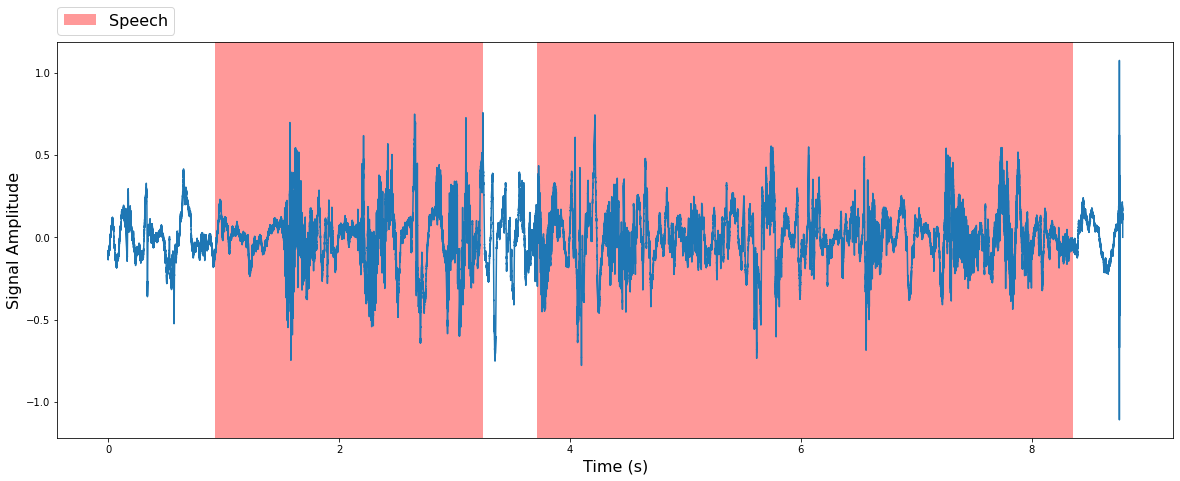

In [0]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 16
plot_signal_and_segmentation(x, sr, [speech])#[music, speech])

finish

In [0]:
x2, sr2 = librosa.load(os.path.join(FILES_PATH, 'Audio_record'))
print(x2.shape, np.min(x2), np.max(x2), sr2)

In [0]:
segments2 = extract_segments(x2, frames=41)

features2 = extract_features(segments2)

predict2 = model.predict_classes(features2)

predict2

In [0]:
results2 = segments2[['s_begin', 's_end']].values
results2 = np.column_stack([results2, predict2])

In [0]:
classes2 = { 0: [], 1: [] }
last_class2 = -1;
last_begin2 = 0;
last_end2 = 0;
for res in results2:
  if last_class2 == -1:
    last_class2 = res[-1]
    last_begin2 = res[0]
    last_end2 = res[1]
  elif res[-1] != last_class2:
    classes2[last_class2].append((
      last_begin2 / sr,
      last_end2 / sr
    ))
    last_class2 = res[-1]
    last_begin2 = res[0]
    last_end2 = res[1]
  else:
    last_end2 = res[1]
    
classes2[last_class2].append((
  last_begin2 / sr,
  last_end2 / sr
))

In [0]:
classes2

In [0]:
speech2 = {"fc" : "r", "ec" : "r", "lw" : 0, "alpha" : 0.4, "title" : "Speech", "timestamps" : classes2[1]}
music2 = {"fc" : "y", "ec" : "y", "lw" : 0, "alpha" : 0.4, "title" : "Music", "timestamps" : classes2[0]}

IPython.display.Audio(x2, rate=sr2)

In [0]:
pylab.rcParams['figure.figsize'] = 20, 16
plot_signal_and_segmentation(x2, sr2, [music2, speech2])